In [1]:
import torch
from torch import nn

import numpy as np
import matplotlib.pyplot as plt

from tqdm import trange

import model
from data import seq_data
from visualization import hidden_repr

# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


In [2]:
## Instantiate model
model = model.Model(
    input_size=1, output_size=1, hidden_dim=30, n_layers=1, device=device
)

## Generate data
xor_problem = lambda seq: np.nansum(seq) % 2
problem = xor_problem
symbols = {0, 1}
dataset_1 = seq_data(device, symbols, problem, n_datapoints=1000, seq_len=5)
dataset_2 = seq_data(device, symbols, problem, n_datapoints=1000, seq_len=4)

dataset_val_1 = seq_data(device, symbols, problem, n_datapoints=5, seq_len=10)
# dataset_val_2 = seq_data(device, symbols, xor_problem, n_datapoints=5, seq_len=31)

In [3]:
## Train

# Define hyperparameters
n_epochs = 10000
lr = 0.01

# Define Loss, Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# Training run
train_losses, val_losses, hidden_states = model.training_run(
    optimizer,
    criterion,
    [dataset_1, dataset_2],
    [dataset_val_1],
    n_epochs=n_epochs,
    batch_size=1000,
)

Training: 100%|██████████| 30000/30000 [06:15<00:00, 79.85steps/s, train_loss=0.00000, val_loss=0.00000] 


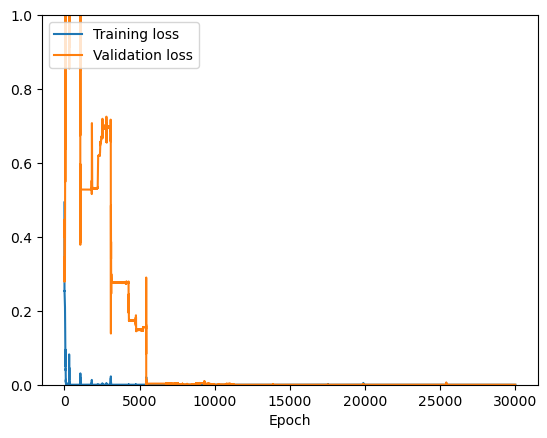

In [4]:
## Plot training and validation loss during training
plt.plot(train_losses, label="Training loss")
plt.plot(val_losses, label="Validation loss")
plt.legend(loc="upper left")
plt.xlabel("Epoch")
plt.ylim(0, 1)
plt.show()

KeyError: 0

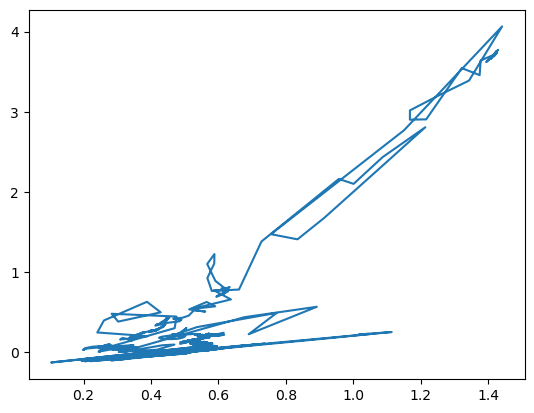

In [9]:
x = hidden_repr(hidden_states.query("Epoch > 1000"), transform="PCA", n_labels=4)
## Color points by training loss/ validation loss

100%|██████████| 100/100 [00:00<00:00, 181.19it/s]


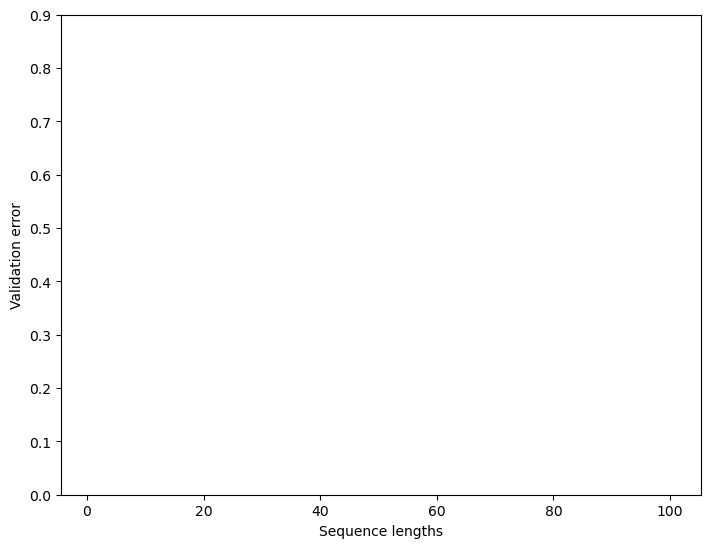

In [6]:
## Plot error per sequence length
N = 100
val_data = []
for n in trange(1, N + 1):
    val_data.append(seq_data(device, symbols, problem, n_datapoints=100, seq_len=n))
val_err = np.array(model.validation(criterion, val_data))

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(np.arange(1, N + 1), val_err)
ax.set_xlabel("Sequence lengths")
ax.set_ylabel("Validation error")
ax.set_yticks(np.arange(0, 1, 0.1))
plt.show()

In [7]:
def predict(model, sequence):
    input = torch.unsqueeze(
        torch.from_numpy(np.array([sequence], dtype=np.float32)), dim=2
    ).to(device)
    out, hidden = model(input)
    return out

In [8]:
print(float(predict(model, [1, 0, 1, 0, 1, 0, 0, 1])))

0.0
